# Init

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

from aspire.BlocksTask import set_blocks_env

from TaskPlanner import set_experiment_env

set_blocks_env()
set_experiment_env()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


# Load Data

In [2]:
# path = "/home/james/EROM/data/EROM-Memories_11-06-2024_18-09-37.pkl"
path = "data/EROM-Memories_11-07-2024_17-59-35.pkl"
data = list()
with open( path, 'rb' ) as f:
    data = pickle.load( f )

# Inspect Data

"Task Start: <class 'NoneType'>"
"ObsMeta: <class 'list'>"
['bbox', 'score', 'label', 'image', 'query', 'abbrv']
a photo of a blue block,

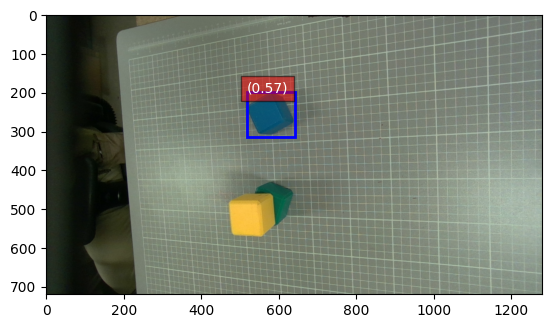

['bbox', 'score', 'label', 'image', 'query', 'abbrv']
a photo of a yellow block,

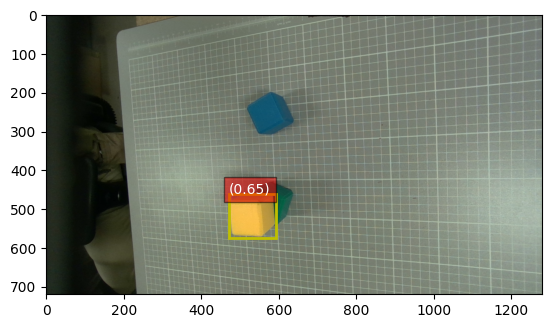

['bbox', 'score', 'label', 'image', 'query', 'abbrv']
a photo of a green block,

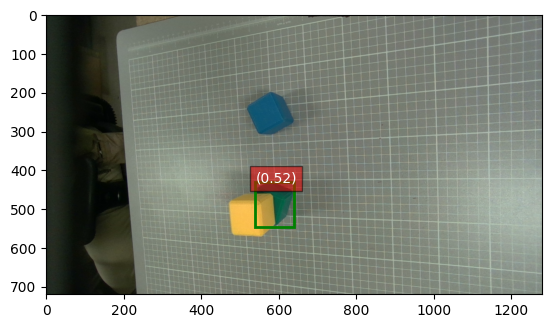

"memory: ['scan']"
"symbols: ['scan']"


In [3]:
from pprint import pprint

import matplotlib.patches as patches

clrDct = {
    'blu' : 'blue',
    'grn' : 'green',
    'ylw' : 'yellow',
}


    

for i, datum in enumerate( data ):

    try:
        pprint( f"{datum['msg']}: {list(datum['data'].keys())}" )
    except Exception:
        pprint( f"{datum['msg']}: {type(datum['data'])}" )

    # if datum['msg'] == 'meta':
    if datum['msg'] == 'ObsMeta':
        
        # pprint( item )

        # for item in datum['data']['hits']:
        for item in datum['data']:

            print( list( item['hits'][0].keys() ) )
        
            # Create a figure and axes
            fig, ax = plt.subplots()
            
            # Display the image
            ax.imshow( item['image'] )

            topHit = None
            topSco = 0.00
            
            for hit in item['hits']:

                if (hit['score'] > 0.100) and (hit['score'] > topSco):
                    topSco = hit['score']
                    topHit = hit

            hit = topHit
            print(item['query'],end=',')
            
            x      = hit['bbox'][0]
            y      = hit['bbox'][1]
            width  = hit['bbox'][2] - x
            height = hit['bbox'][3] - y

            # Create a Rectangle patch
            rect = patches.Rectangle( (x, y), width, height, linewidth=2, 
                                      edgecolor = item['abbrv'][:1], 
                                      facecolor = 'none')
            
            # Add the patch to the axes
            ax.add_patch( rect )
            

            # Add score and label text
            text = f"({hit['score']:.2f})"
            ax.text(x, y, text, color='white', bbox=dict(facecolor='red', alpha=0.5))
            
            plt.show()

In [4]:
# FIXME: WHAT IF THE BOX INCLUDES POINTS FROM AN OBJECT ON TOP? HOW TO SUBTRACT?
# GET PCD AND INSPECT
# Maybe send it to the box that matches the color the most
